# **Data Pre-processing Phase**
First, we will import the required python libraries.
We are using numpy for mathematical operations,pandas for dataset manipulation and matplotlib for plotting and visualising.



In [0]:
import numpy as np  
import matplotlib.pyplot as plt  
import pandas as pd

Standard code for uploading a file in colab

In [0]:
from google.colab import files

uploaded = files.upload()

Saving diesel_train.csv to diesel_train.csv


Importing the data set into a pandas dataframe.


In [0]:
dataset = pd.read_csv('diesel_train.csv')

We are only interested in the Diesel price . Therefore, we will filter all the data from our training set and will retain only the values for the Diesel column.

In [0]:
dataset_true = dataset.iloc[:, 1:2].values 

Whenever we use a neural network, we should normalize or scale your data. We will use MinMaxScaler class from the sklear.preprocessing library to scale our data between 0 and 1. The feature_range parameter is used to specify the range of the scaled data.

In [0]:

from sklearn.preprocessing import MinMaxScaler  
scaler = MinMaxScaler(feature_range = (0, 1))

dataset_scaled = scaler.fit_transform(dataset_true)  

We are going to predict the Diesel price based on the Diesel price for the past 90 days.
Our feature set should contain the Diesel price values for the past 90 days while the label or dependent variable should be the Diesel price at the 91st day.

In [0]:
features_set = []  
labels = []  
for i in range(90, 4230):  
    features_set.append(dataset_scaled[i-90:i, 0])
    labels.append(dataset_scaled[i, 0])

We need to convert both the feature_set and the labels list to the numpy array before we can use it for training.

In [0]:
features_set, labels = np.array(features_set), np.array(labels) 

In order to train LSTM on our data, we need to convert our data into the shape accepted by the LSTM. We need to convert our data into three-dimensional format. The first dimension is the number of records or rows in the dataset which is 4230 in our case. The second dimension is the number of time steps which is 90 while the last dimension is the number of indicators. Since we are only using one feature, i.e Diesel Price, the number of indicators will be one.

In [0]:
features_set = np.reshape(features_set, (features_set.shape[0], features_set.shape[1], 1))  

# **Model Building Phase (Adding LSTM layers + Output Layer)**
We have preprocessed our data and have converted it into the desired format. now is the time to create our LSTM. The LSTM model that we are going to create will be a sequential model with multiple layers. We will add four LSTM layers to our model followed by a dense layer that predicts the future Diesel price.

Let's first import the libraries that we are going to need in order to create our model

In [0]:
from keras.models import Sequential  
from keras.layers import Dense  
from keras.layers import LSTM  
from keras.layers import Dropout  

Using TensorFlow backend.


As a first step, we need to instantiate the Sequential class. This will be our model class and we will add LSTM, Dropout and Dense layers to this model. 

In [0]:
model = Sequential()

To add a layer to the sequential model, the add method is used. Inside the add method, we passed our LSTM layer. The first parameter to the LSTM layer is the number of neurons or nodes that we want in the layer. The second parameter is return_sequences, which is set to true since we will add more layers to the model. The first parameter to the input_shape is the number of time steps while the last parameter is the number of indicators.

In [0]:
model.add(LSTM(units=50, return_sequences=True, input_shape=(features_set.shape[1], 1)))  

Let's now add a dropout layer to our model. Dropout layer is added to avoid over-fitting, which is a phenomenon where a machine learning model performs better on the training data compared to the test data.

In [0]:
model.add(Dropout(0.2))

In [0]:
model.add(LSTM(units=50, return_sequences=True))  
model.add(Dropout(0.2))

model.add(LSTM(units=50, return_sequences=True))  
model.add(Dropout(0.2))

model.add(LSTM(units=50))  
model.add(Dropout(0.2))  

To make our model more robust, we add a dense layer at the end of the model. The number of neurons in the dense layer will be set to 1 since we want to predict a single value in the output.

In [0]:
model.add(Dense(units = 1)) 

In [0]:
model.compile(optimizer = 'adam', loss = 'mean_squared_error') 

Now is the time to train the model that we defined in the previous few steps. To do so, we call the fit method on the model and pass it our training features and labels

In [0]:
model.fit(features_set, labels, epochs = 100, batch_size = 32) 

Instructions for updating:
Use tf.cast instead.
Epoch 1/100
4140/4140 [==============================] - 106s 26ms/step - loss: 0.0102
Epoch 2/100
4140/4140 [==============================] - 99s 24ms/step - loss: 0.0022
Epoch 3/100
4140/4140 [==============================] - 99s 24ms/step - loss: 0.0018
Epoch 4/100
4140/4140 [==============================] - 99s 24ms/step - loss: 0.0018
Epoch 5/100
4140/4140 [==============================] - 99s 24ms/step - loss: 0.0018
Epoch 6/100
4140/4140 [==============================] - 99s 24ms/step - loss: 0.0016
Epoch 7/100
4140/4140 [==============================] - 99s 24ms/step - loss: 0.0015
Epoch 8/100
4140/4140 [==============================] - 99s 24ms/step - loss: 0.0014
Epoch 9/100
4140/4140 [==============================] - 99s 24ms/step - loss: 0.0013
Epoch 10/100
4140/4140 [==============================] - 99s 24ms/step - loss: 0.0013
Epoch 11/100
4140/4140 [==============================] - 100s 24ms/step - loss: 0.0013
Ep

# **Prediction and Visualization of Results**

In [0]:
from google.colab import files

uploaded = files.upload()

Saving diesel_test.csv to diesel_test.csv


In [0]:
dataset_new = pd.read_csv('diesel_test.csv')  
dataset_new_processed = dataset_new .iloc[:, 1:2].values  

We should concatenate our training data and test data before preprocessing.

In [0]:
dataset_total = pd.concat((dataset['Delhi'], dataset_new['Delhi']), axis=0)  

Now let's prepare our test inputs. The input for each day should contain the Diesel prices for the previous 90 days.

In [0]:
test_inputs = dataset_total[len(dataset_total) - len(dataset_new) - 90:].values  

In [0]:
test_inputs = test_inputs.reshape(-1,1)  
test_inputs = scaler.transform(test_inputs) 

In [0]:
test_features = []  
for i in range(90, 1076):  
    test_features.append(test_inputs[i-90:i, 0])

In [0]:
test_features = np.array(test_features)  
test_features = np.reshape(test_features, (test_features.shape[0], test_features.shape[1], 1))  


We preprocessed our test data and now we can use it to make predictions.

In [0]:
predictions = model.predict(test_features) 

Since we scaled our data, the predictions made by the LSTM are also scaled. We need to reverse the scaled prediction back to their actual values. To do so, we can use the ìnverse_transform method of the scaler object we created during training.

In [0]:
predictions = scaler.inverse_transform(predictions)

Let's plot our predictions against actual values using matplotlib.

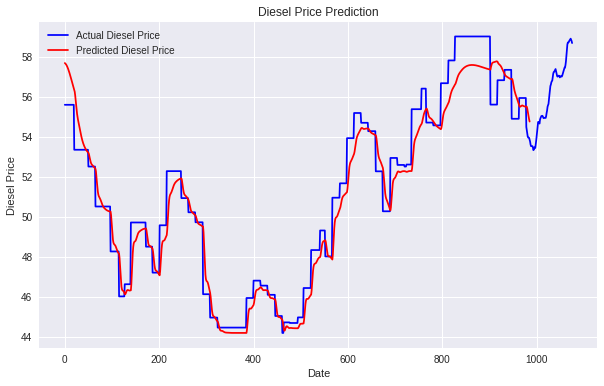

In [0]:
plt.figure(figsize=(10,6))  
plt.plot(dataset_new_processed, color='blue', label='Actual Diesel Price')  
plt.plot(predictions , color='red', label='Predicted Diesel Price')  
plt.title('Diesel Price Prediction')  
plt.xlabel('Date')  
plt.ylabel('Diesel Price')  
plt.legend()  
plt.show()  